In [3]:
from pathlib import Path
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.transform import resize
from racts_utils import load_sim_data

In [7]:
version = 2
# for dset in ['train', 'val', 'test']:
#     output_dir = '/work/bel25/sim_datasets/{}_dobj_v{}'.format(dset, version)
#     paths = list(Path(output_dir).iterdir())
#     print(dset, f"n= {len(paths)}")

dset = 'val'
output_dir = '/work/bel25/sim_datasets/{}_dobj_v{}'.format(dset, version)
paths = list(Path(output_dir).iterdir())
len(paths)

3505

In [5]:
img, sino, settings = load_sim_data(1, dset='val', version=2)
sino.shape

(512, 512)

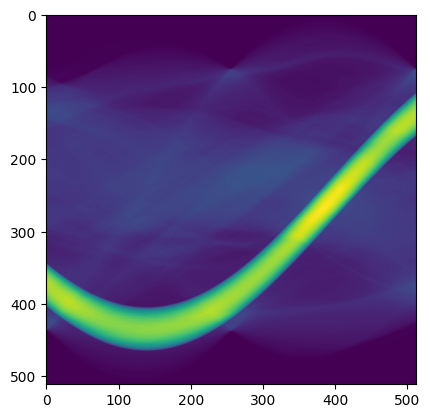

In [8]:
plt.imshow(sino)

In [ ]:
import h5py
import numpy as np
from racts_utils import load_sim_data 

class generator:
    def __call__(self, index):
#         with h5py.File(file, 'r') as hf:
        img, sino, settings = load_sim_data(index, dset='train', version=1)
        sino = resize(sino, (512,512)) # tshould this be in transform...
        sino = sino[:,:,np.newaxis]
        yield sino
#             for im in hf["train_img"]:
#                 yield im

file_inds = np.arange(1,10)

cycle_length = 1
block_length = 1
ds = tf.data.Dataset.from_tensor_slices(file_inds)
ds = ds.interleave(lambda file_ind: tf.data.Dataset.from_generator(
        generator(), 
        tf.uint8, 
        tf.TensorShape([512,512,1]),
        args=(file_ind,)),
       cycle_length, block_length)
next(iter(ds))

In [29]:
a = iter(ds)

In [30]:
b = next(a)

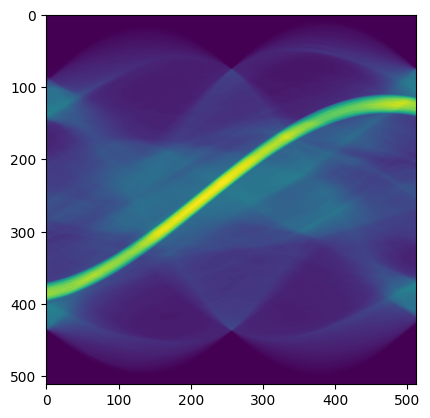

In [39]:
plt.imshow(b)